<a href="https://colab.research.google.com/github/Viknesh-Rajaramon/Data-Mining/blob/master/HW3/HW3_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162728 sha256=9a09346fca70548a4d86796a8f26d60a7d9ad9004915aa7cce353ab9380581af
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate, train_test_split

import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

#### a) Read data from “ratings small.csv” with line format: 'userID movieID rating timestamp'.

In [4]:
# Load data from CSV file
file_path = "/content/drive/MyDrive/CSE572/ratings_small.csv"  # Replace with the actual path to your file

# Create a Surprise Reader to parse the ratings
reader = Reader(line_format = "user item rating timestamp", sep = ",", skip_lines = 1)

# Load the dataset with the reader
data = Dataset.load_from_file(file_path, reader)

In [5]:
# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size = 0.20)

#### c) Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation

##### Probabilistic Matrix Factorization (PMF)

In [6]:
svd_model = SVD()
pmf_results = cross_validate(svd_model, data, measures = ["MAE", "RMSE"], cv = 5, verbose = True)

# Train the model on the entire dataset
svd_model.fit(trainset)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6856  0.6961  0.6868  0.6860  0.6921  0.6893  0.0041  
RMSE (testset)    0.8922  0.9036  0.8902  0.8930  0.8981  0.8954  0.0049  
Fit time          1.32    1.35    1.34    1.36    1.36    1.35    0.01    
Test time         0.27    0.14    0.12    0.26    0.12    0.18    0.07    


##### User based Collaborative Filtering

In [7]:
knn_user_model = KNNBasic(sim_options = {"user_based": True})
user_results = cross_validate(knn_user_model, data, measures = ["MAE", "RMSE"], cv = 5, verbose = True)

# Train the user-based model on the entire dataset
knn_user_model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7481  0.7447  0.7440  0.7464  0.7355  0.7437  0.0043  
RMSE (testset)    0.9719  0.9700  0.9653  0.9720  0.9557  0.9670  0.0062  
Fit time          0.12    0.16    0.16    0.16    0.23    0.16    0.04    
Test time         1.58    1.42    2.05    1.56    3.01    1.92    0.58    
Computing the msd similarity matrix...
Done computing similarity matrix.


##### Item based Collaborative Filtering

In [8]:
knn_item_model = KNNBasic(sim_options = {"user_based": False})
item_results = cross_validate(knn_item_model, data, measures = ["MAE", "RMSE"], cv = 5, verbose = True)

# Train the item-based model on the entire dataset
knn_item_model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7211  0.7219  0.7202  0.7255  0.7173  0.7212  0.0027  
RMSE (testset)    0.9341  0.9365  0.9353  0.9419  0.9293  0.9354  0.0041  
Fit time          6.30    13.46   7.35    6.46    4.55    7.63    3.06    
Test time         6.81    7.05    7.51    8.29    7.50    7.43    0.50    
Computing the msd similarity matrix...
Done computing similarity matrix.


#### d) Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data?

In [9]:
df_mae_rmse = pd.DataFrame({
    "Model": ["Probabilistic Matrix Factorization (PMF)", "User-based Collaborative Filtering", "Item-based Collaborative Filtering"],
    "Average_MAE": [sum(pmf_results['test_mae']) / 5, sum(user_results['test_mae']) / 5, sum(item_results['test_mae']) / 5],
    "Average_RMSE": [sum(pmf_results['test_rmse']) / 5, sum(user_results['test_rmse']) / 5, sum(item_results['test_rmse']) / 5]
})
df_mae_rmse

,Model,Average_MAE,Average_RMSE
0,Probabilistic Matrix Factorization (PMF),0.689336,0.895424
1,User-based Collaborative Filtering,0.743733,0.966954
2,Item-based Collaborative Filtering,0.721213,0.935395


#### e) Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering?

##### User based Collaborative Filtering

In [10]:
# Cosine similarity
algo_UBCF_cosine = KNNBasic(sim_options = {"name": "cosine", "user_based": True})
CV_UBCF_cosine = cross_validate(algo_UBCF_cosine, data, measures = ["MAE", "RMSE"], cv = 5, verbose = True)

# MSD (Mean Squared Difference) similarity
algo_UBCF_msd = KNNBasic(sim_options = {"name": "msd", "user_based": True})
CV_UBCF_msd = cross_validate(algo_UBCF_msd, data, measures = ["MAE", "RMSE"], cv = 5, verbose = True)

# Pearsom similarity
algo_UBCF_pearson = KNNBasic(sim_options = {"name": "pearson", "user_based": True})
CV_UBCF_pearson = cross_validate(algo_UBCF_pearson, data, measures = ["MAE", "RMSE"], cv = 5, verbose = True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7702  0.7671  0.7675  0.7713  0.7630  0.7678  0.0029  
RMSE (testset)    0.9955  0.9919  0.9923  0.9965  0.9902  0.9933  0.0023  
Fit time          0.21    0.40    0.25    0.25    0.25    0.27    0.07    
Test time         3.08    1.59    1.48    1.58    1.47    1.84    0.62    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

##### Item based Collaborative Filtering

In [11]:
# Cosine similarity
algo_IBCF_cosine = KNNBasic(sim_options = {"name": "cosine", "user_based": False})
CV_IBCF_cosine = cross_validate(algo_IBCF_cosine, data, measures = ["MAE", "RMSE"], cv = 5, verbose = True)

# MSD (Mean Squared Difference) similarity
algo_IBCF_msd = KNNBasic(sim_options = {"name": "msd", "user_based": False})
CV_IBCF_msd = cross_validate(algo_IBCF_msd, data, measures = ["MAE", "RMSE"], cv = 5, verbose = True)

# Pearsom similarity
algo_IBCF_pearson = KNNBasic(sim_options = {"name": "pearson", "user_based": False})
CV_IBCF_pearson = cross_validate(algo_IBCF_pearson, data, measures = ["MAE", "RMSE"], cv = 5, verbose = True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7723  0.7857  0.7747  0.7737  0.7745  0.7762  0.0048  
RMSE (testset)    0.9920  1.0108  0.9931  0.9960  0.9921  0.9968  0.0072  
Fit time          8.39    7.95    9.13    8.38    6.92    8.15    0.72    
Test time         6.70    20.25   8.89    9.44    9.59    10.97   4.75    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

##### RMSE and MAE plot - User Based Collaborative Filtering and Item Based Collaborative Filtering

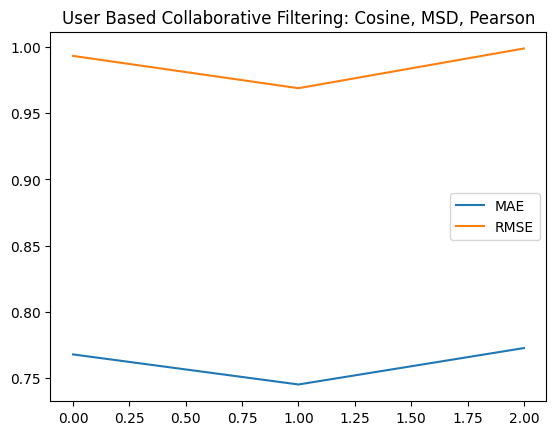

In [12]:
mae = [CV_UBCF_cosine["test_mae"].mean(), CV_UBCF_msd["test_mae"].mean(), CV_UBCF_pearson["test_mae"].mean()]
rmse = [CV_UBCF_cosine["test_rmse"].mean(), CV_UBCF_msd["test_rmse"].mean(), CV_UBCF_pearson["test_rmse"].mean()]

plt.title("User Based Collaborative Filtering: Cosine, MSD, Pearson")
plt.plot(mae, label = "MAE")
plt.plot(rmse, label = "RMSE")
plt.legend()
plt.show()

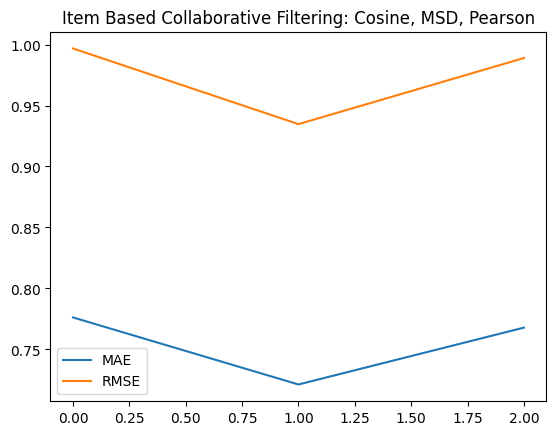

In [13]:
mae = [CV_IBCF_cosine["test_mae"].mean(), CV_IBCF_msd["test_mae"].mean(), CV_IBCF_pearson["test_mae"].mean()]
rmse = [CV_IBCF_cosine["test_rmse"].mean(), CV_IBCF_msd["test_rmse"].mean(), CV_IBCF_pearson["test_rmse"].mean()]

plt.title("Item Based Collaborative Filtering: Cosine, MSD, Pearson")
plt.plot(mae, label = "MAE")
plt.plot(rmse, label = "RMSE")
plt.legend()
plt.show()

#### f) Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results.

##### User based Collaborative Filtering

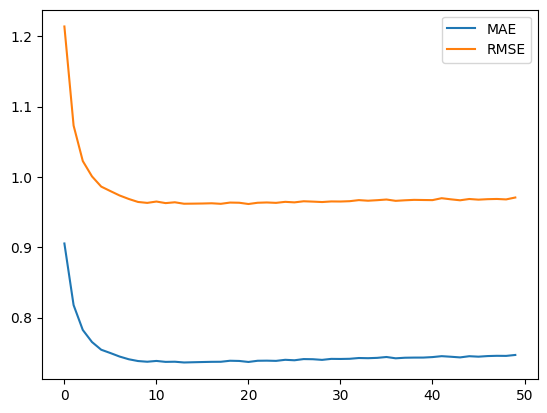

In [14]:
user_mae, user_rmse = [], []

for i in range(1, 51):
    algo = KNNBasic(k = i, sim_options = {"user_based": True}, verbose = False)
    CV_user = cross_validate(algo, data, measures = ["MAE", "RMSE"], cv = 5, verbose = False)
    user_rmse.append(CV_user["test_rmse"].mean())
    user_mae.append(CV_user["test_mae"].mean())

plt.plot(user_mae, label = "MAE")
plt.plot(user_rmse, label = "RMSE")
plt.legend()
plt.show()

##### Item based Collaborative Filtering

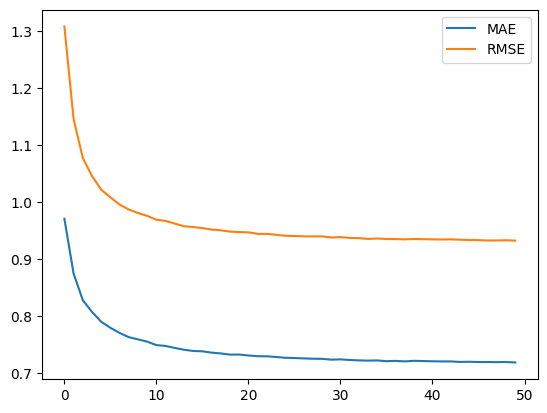

In [15]:
item_mae, item_rmse = [], []

for i in range(1, 51):
    algo = KNNBasic(k = i, sim_options = {"user_based": False}, verbose = False)
    CV_item = cross_validate(algo, data, measures = ["MAE", "RMSE"], cv = 5, verbose = False)
    item_rmse.append(CV_item["test_rmse"].mean())
    item_mae.append(CV_item["test_mae"].mean())

plt.plot(item_mae, label = "MAE")
plt.plot(item_rmse, label = "RMSE")
plt.legend()
plt.show()

#### g) Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE. Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering?

In [17]:
print("Best k for User based Collaborative Filtering: ", user_rmse.index(min(user_rmse)) + 1)
print("Best k for Item based Collaborative Filtering: ", item_rmse.index(min(item_rmse)) + 1)

Best k for User based Collaborative Filtering:  21
Best k for Item based Collaborative Filtering:  50
